Last updated: 16 Feb 2023

# INFO 40975 Artificial Intelligence Final Project


Name: Yi Zhang

ID:  991465122





In [1]:
!pip install pycaret[full]

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [7]:
import pandas as pd
df_abalone = pd.read_csv('abalone.data', header=None)
df_abalone
df_abalone.columns = [
    "Sex",            # categorical: M, F, I
    "Length",         # continuous
    "Diameter",       # continuous
    "Height",         # continuous
    "Whole_weight",   # continuous
    "Shucked_weight", # continuous
    "Viscera_weight", # continuous
    "Shell_weight",   # continuous
    "Rings"           # integer
]

df_abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [8]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df_abalone, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [9]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [10]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [11]:
# init setup on exp
exp.setup(df_abalone, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [12]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5542,0.0000,0.5542,0.5455,0.5362,0.3257,0.3333,1.0890
ridge,Ridge Classifier,0.5491,0.0000,0.5491,0.5358,0.5304,0.3210,0.3279,0.0430
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0350
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5364,0.3161,0.3191,1.4990
rf,Random Forest Classifier,0.5436,0.7409,0.5436,0.5365,0.5384,0.3125,0.3135,0.7020
catboost,CatBoost Classifier,0.5412,0.7383,0.5412,0.5355,0.5370,0.3096,0.3103,6.6260
et,Extra Trees Classifier,0.5330,0.7361,0.5330,0.5250,0.5274,0.2973,0.2982,0.5620
lightgbm,Light Gradient Boosting Machine,0.5323,0.7334,0.5323,0.5262,0.5282,0.2960,0.2966,0.9370
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.2000
qda,Quadratic Discriminant Analysis,0.5265,0.0000,0.5265,0.5136,0.4942,0.2861,0.2990,0.0370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [13]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5542,0.0000,0.5542,0.5455,0.5362,0.3257,0.3333,0.1520
ridge,Ridge Classifier,0.5491,0.0000,0.5491,0.5358,0.5304,0.3210,0.3279,0.0360
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0380
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5364,0.3161,0.3191,1.5070
rf,Random Forest Classifier,0.5436,0.7409,0.5436,0.5365,0.5384,0.3125,0.3135,0.5530
catboost,CatBoost Classifier,0.5412,0.7383,0.5412,0.5355,0.5370,0.3096,0.3103,6.4710
et,Extra Trees Classifier,0.5330,0.7361,0.5330,0.5250,0.5274,0.2973,0.2982,0.4050
lightgbm,Light Gradient Boosting Machine,0.5323,0.7334,0.5323,0.5262,0.5282,0.2960,0.2966,0.7590
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.2980
qda,Quadratic Discriminant Analysis,0.5265,0.0000,0.5265,0.5136,0.4942,0.2861,0.2990,0.0630


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Analyze Model

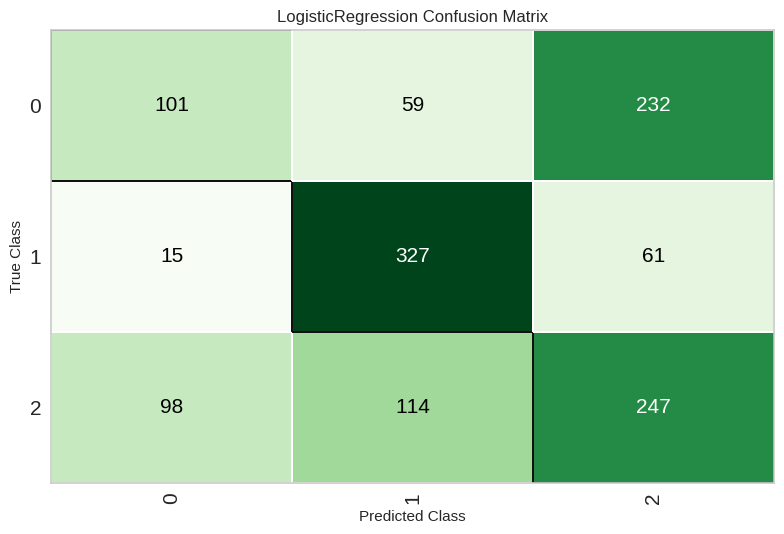

In [14]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

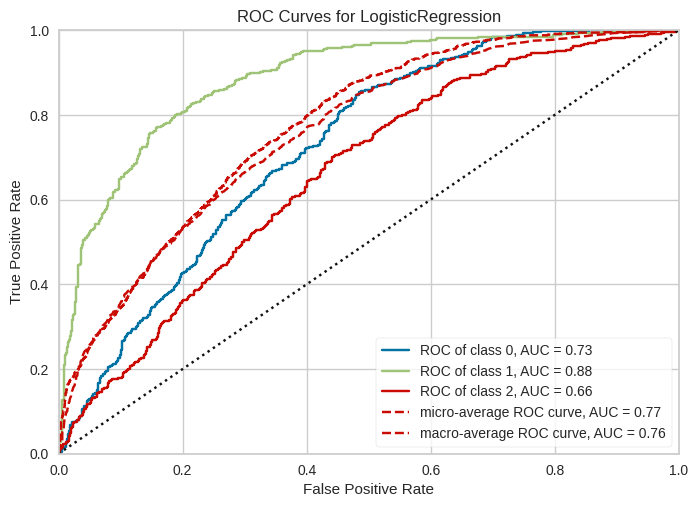

In [15]:
# plot AUC
plot_model(best, plot = 'auc')

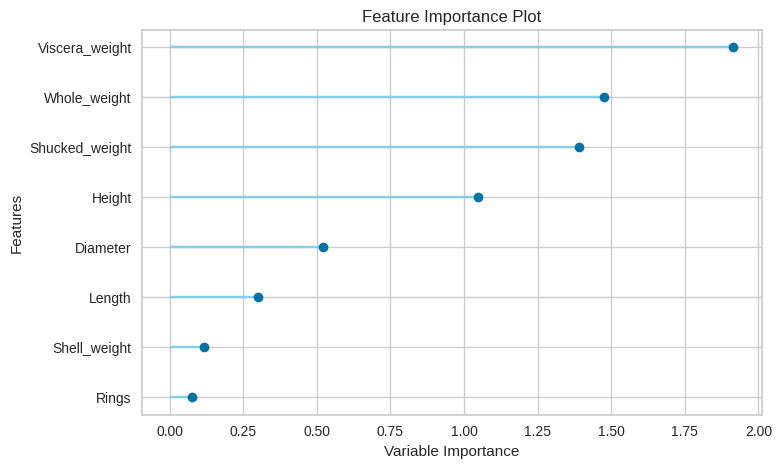

In [16]:
# plot feature importance
plot_model(best, plot = 'feature')

In [17]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [18]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [19]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5383,0.7535,0.5383,0.5251,0.5180,0.3014,0.3086


In [20]:
# show predictions df
holdout_pred.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex,prediction_label,prediction_score
1948,0.635,0.515,0.165,1.2290,0.5055,0.2975,0.3535,10,M,F,0.4948
956,0.495,0.400,0.135,0.6100,0.2720,0.1435,0.1440,7,M,I,0.5164
1341,0.585,0.490,0.185,1.1710,0.5220,0.2535,0.3350,10,M,M,0.4997
821,0.370,0.275,0.140,0.2215,0.0970,0.0455,0.0615,6,I,I,0.8120
569,0.410,0.320,0.115,0.3870,0.1650,0.1005,0.0985,11,F,I,0.4543


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [23]:
# copy data and drop Class variable

new_data = df_abalone.copy()
new_data.drop('Sex', axis=1, inplace=True)
new_data.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,prediction_label,prediction_score
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M,0.4598
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,I,0.7624
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,I,0.3887
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,I,0.4144
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I,0.7660


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [25]:
# save pipeline
save_model(best, 'abalone_sex_classifier"')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicato...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                      

In [26]:
# load pipeline
loaded_best_pipeline = load_model('abalone_sex_classifier"')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(a...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# 👇 Detailed function-by-function overview

## ✅ Setup


In [27]:
s = setup(df_abalone, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [28]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [29]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
629,0.340,0.265,0.085,0.1835,0.0770,0.0460,0.0650,10.0
1496,0.620,0.480,0.165,1.0725,0.4815,0.2350,0.3120,9.0
323,0.265,0.205,0.070,0.1055,0.0390,0.0410,0.0350,5.0
2473,0.615,0.470,0.175,1.2985,0.5135,0.3430,0.3200,14.0
3996,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6.0
...,...,...,...,...,...,...,...,...
4140,0.645,0.535,0.190,1.2395,0.4680,0.2385,0.4240,10.0
2478,0.470,0.355,0.180,0.4410,0.1525,0.1165,0.1350,8.0
3060,0.630,0.515,0.175,1.1955,0.4920,0.2470,0.3700,11.0
3939,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14.0


In [30]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [31]:
# init setup with normalize = True

s = setup(df_abalone, target = 'Sex', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


<Axes: >

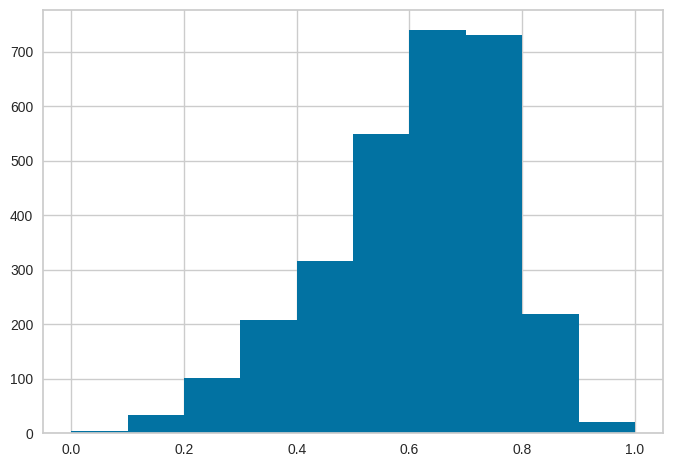

In [32]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Length'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

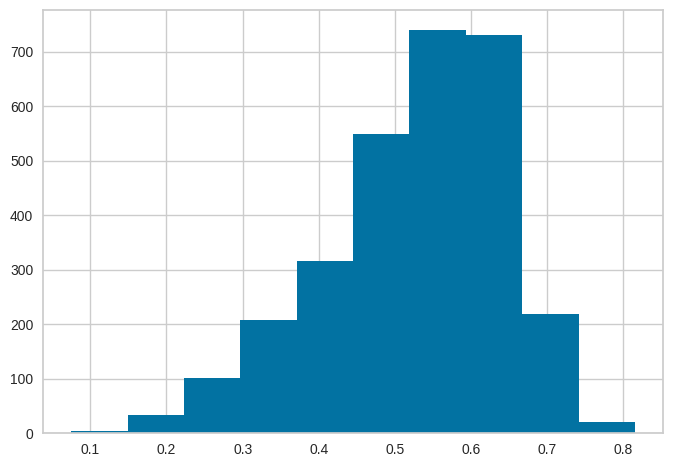

In [33]:
get_config('X_train')['Length'].hist()

## ✅ Compare Models


In [34]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.5569,0.0000,0.5569,0.5117,0.5175,0.3292,0.3519,0.0710
lr,Logistic Regression,0.5552,0.0000,0.5552,0.5471,0.5383,0.3274,0.3346,1.0210
ridge,Ridge Classifier,0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330,0.0450
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0470
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5365,0.3162,0.3191,1.5510
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.5720
catboost,CatBoost Classifier,0.5409,0.7383,0.5409,0.5352,0.5367,0.3090,0.3098,6.6510
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,0.6630
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.4430
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.2580


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [35]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [36]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5365,0.3162,0.3191,1.6730
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.5720
catboost,CatBoost Classifier,0.5409,0.7383,0.5409,0.5352,0.5367,0.3090,0.3098,6.6620
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,1.0580
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.6140
xgboost,Extreme Gradient Boosting,0.5210,0.7237,0.5210,0.5152,0.5170,0.2787,0.2793,0.3190
dt,Decision Tree Classifier,0.4837,0.6111,0.4837,0.4847,0.4834,0.2247,0.2250,0.0620


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [37]:
compare_tree_models

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [38]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5365,0.3162,0.3191,1.673
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.572
catboost,CatBoost Classifier,0.5409,0.7383,0.5409,0.5352,0.5367,0.3090,0.3098,6.662
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,1.058
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.614
xgboost,Extreme Gradient Boosting,0.5210,0.7237,0.5210,0.5152,0.5170,0.2787,0.2793,0.319
dt,Decision Tree Classifier,0.4837,0.6111,0.4837,0.4847,0.4834,0.2247,0.2250,0.062


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [39]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.5569,0.0000,0.5569,0.5117,0.5175,0.3292,0.3519,0.0700
lr,Logistic Regression,0.5552,0.0000,0.5552,0.5471,0.5383,0.3274,0.3346,1.0990
ridge,Ridge Classifier,0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330,0.1080
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0660
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5365,0.3162,0.3191,1.6870
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.6280
catboost,CatBoost Classifier,0.5409,0.7383,0.5409,0.5352,0.5367,0.3090,0.3098,6.7910
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,0.8500
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.4320
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.2120


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [40]:
# list of top 3 models by Recall
best_recall_models_top3

[SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [41]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5358,0.7418,0.5358,0.5329,0.5333,0.2999,0.3007
1,0.5597,0.7453,0.5597,0.5670,0.5625,0.3363,0.3369
2,0.5154,0.7297,0.5154,0.5089,0.5118,0.2707,0.2708
3,0.5240,0.7298,0.5240,0.5135,0.5158,0.2815,0.2832
4,0.5445,0.7409,0.5445,0.5339,0.5377,0.3139,0.3148
5,0.5411,0.7362,0.5411,0.5296,0.5340,0.3096,0.3104
6,0.5719,0.7601,0.5719,0.5680,0.5698,0.3561,0.3562
7,0.5685,0.7526,0.5685,0.5562,0.5592,0.3520,0.3539
8,0.5308,0.7276,0.5308,0.5231,0.5261,0.2933,0.2939


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [42]:
rf_results = pull()
print(type(rf_results))
rf_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5358,0.7418,0.5358,0.5329,0.5333,0.2999,0.3007
1,0.5597,0.7453,0.5597,0.5670,0.5625,0.3363,0.3369
2,0.5154,0.7297,0.5154,0.5089,0.5118,0.2707,0.2708
3,0.5240,0.7298,0.5240,0.5135,0.5158,0.2815,0.2832
4,0.5445,0.7409,0.5445,0.5339,0.5377,0.3139,0.3148
5,0.5411,0.7362,0.5411,0.5296,0.5340,0.3096,0.3104
6,0.5719,0.7601,0.5719,0.5680,0.5698,0.3561,0.3562
7,0.5685,0.7526,0.5685,0.5562,0.5592,0.3520,0.3539
8,0.5308,0.7276,0.5308,0.5231,0.5261,0.2933,0.2939


In [43]:
rf = create_model('rf', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5364,0.7405,0.5364,0.5401,0.5376,0.3010,0.3015
1,0.5370,0.7420,0.5370,0.5279,0.5314,0.3037,0.3043
2,0.5534,0.7461,0.5534,0.5445,0.5480,0.3285,0.3290
Mean,0.5423,0.7428,0.5423,0.5375,0.5390,0.3111,0.3116
Std,0.0079,0.0023,0.0079,0.0070,0.0069,0.0124,0.0124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
create_model('rf', n_estimators=200, max_depth=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5461,0.7487,0.5461,0.5369,0.5388,0.3149,0.3166
1,0.5495,0.7610,0.5495,0.5529,0.5494,0.3199,0.3211
2,0.5256,0.7421,0.5256,0.5162,0.5199,0.2850,0.2856
3,0.5548,0.7441,0.5548,0.5350,0.5366,0.3273,0.3323
4,0.5377,0.7481,0.5377,0.5234,0.5281,0.3033,0.3047
5,0.5342,0.7449,0.5342,0.5221,0.5267,0.2984,0.2993
6,0.5582,0.7550,0.5582,0.5513,0.5513,0.3324,0.3347
7,0.5651,0.7522,0.5651,0.5509,0.5515,0.3441,0.3478
8,0.5342,0.7378,0.5342,0.5213,0.5242,0.2985,0.3004


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=200, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [46]:
create_model('rf', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

## ✅ Tune Model



In [47]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5358,0.7418,0.5358,0.5329,0.5333,0.2999,0.3007
1,0.5597,0.7453,0.5597,0.5670,0.5625,0.3363,0.3369
2,0.5154,0.7297,0.5154,0.5089,0.5118,0.2707,0.2708
3,0.5240,0.7298,0.5240,0.5135,0.5158,0.2815,0.2832
4,0.5445,0.7409,0.5445,0.5339,0.5377,0.3139,0.3148
5,0.5411,0.7362,0.5411,0.5296,0.5340,0.3096,0.3104
6,0.5719,0.7601,0.5719,0.5680,0.5698,0.3561,0.3562
7,0.5685,0.7526,0.5685,0.5562,0.5592,0.3520,0.3539
8,0.5308,0.7276,0.5308,0.5231,0.5261,0.2933,0.2939


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5631,0.7574,0.5631,0.5548,0.5540,0.3471,0.3501
1,0.5529,0.7671,0.5529,0.5482,0.5489,0.3305,0.3317
2,0.5495,0.7702,0.5495,0.5498,0.5353,0.3302,0.3400
3,0.5719,0.7534,0.5719,0.5670,0.5555,0.3627,0.3712
4,0.5171,0.7518,0.5171,0.5075,0.5018,0.2809,0.2867
5,0.5342,0.7438,0.5342,0.5321,0.5203,0.3076,0.3160
6,0.5685,0.7614,0.5685,0.5617,0.5621,0.3546,0.3567
7,0.5514,0.7489,0.5514,0.5529,0.5287,0.3347,0.3481
8,0.5377,0.7397,0.5377,0.5303,0.5286,0.3097,0.3130


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [49]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [50]:
rf_grid = {'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]}

tuned_rf = tune_model(rf,
    custom_grid=rf_grid,
    optimize='F1' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5392,0.7507,0.5392,0.5318,0.5310,0.3030,0.3062
1,0.5392,0.7573,0.5392,0.5458,0.5378,0.3024,0.3058
2,0.5358,0.7387,0.5358,0.5242,0.5269,0.2986,0.3008
3,0.5822,0.7473,0.5822,0.5674,0.5652,0.3691,0.3749
4,0.5514,0.7598,0.5514,0.5377,0.5415,0.3230,0.3250
5,0.5205,0.7431,0.5205,0.5011,0.5074,0.2766,0.2786
6,0.5445,0.7506,0.5445,0.5364,0.5394,0.3135,0.3142
7,0.5685,0.7525,0.5685,0.5561,0.5565,0.3500,0.3533
8,0.5651,0.7451,0.5651,0.5545,0.5558,0.3446,0.3469


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [51]:
tuned_rf, tuner = tune_model(rf, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5631,0.7574,0.5631,0.5548,0.5540,0.3471,0.3501
1,0.5529,0.7671,0.5529,0.5482,0.5489,0.3305,0.3317
2,0.5495,0.7702,0.5495,0.5498,0.5353,0.3302,0.3400
3,0.5719,0.7534,0.5719,0.5670,0.5555,0.3627,0.3712
4,0.5171,0.7518,0.5171,0.5075,0.5018,0.2809,0.2867
5,0.5342,0.7438,0.5342,0.5321,0.5203,0.3076,0.3160
6,0.5685,0.7614,0.5685,0.5617,0.5621,0.3546,0.3567
7,0.5514,0.7489,0.5514,0.5529,0.5287,0.3347,0.3481
8,0.5377,0.7397,0.5377,0.5303,0.5286,0.3097,0.3130


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [52]:
tuned_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [53]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'W...
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                                                           260,
                                                                           270,
 

In [54]:
tuned_rf = tune_model(rf, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5461,0.7628,0.5461,0.5085,0.5033,0.3084,0.3265
1,0.5563,0.7662,0.5563,0.5555,0.5425,0.3257,0.3355
2,0.6212,0.7711,0.6212,0.6312,0.6075,0.4245,0.4376
3,0.5719,0.7542,0.5719,0.5563,0.5557,0.3534,0.3584
4,0.5308,0.7541,0.5308,0.5082,0.5066,0.2887,0.2963
5,0.5274,0.7395,0.5274,0.5132,0.5115,0.2837,0.2891
6,0.5514,0.7627,0.5514,0.5347,0.5323,0.3188,0.3267
7,0.5548,0.7498,0.5548,0.5379,0.5395,0.3281,0.3320
8,0.5822,0.7456,0.5822,0.5792,0.5702,0.3670,0.3739


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 2923 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


## ✅ Ensemble Model

In [55]:
ensemble_model(rf, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5597,0.7479,0.5597,0.5511,0.5504,0.3340,0.3376
1,0.5392,0.7532,0.5392,0.5423,0.5394,0.3048,0.3057
2,0.5188,0.7266,0.5188,0.5104,0.5134,0.2741,0.2750
3,0.5514,0.7363,0.5514,0.5324,0.5348,0.3234,0.3275
4,0.5582,0.7571,0.5582,0.5484,0.5518,0.3345,0.3355
5,0.5479,0.7425,0.5479,0.5375,0.5415,0.3200,0.3206
6,0.5582,0.7539,0.5582,0.5533,0.5548,0.3340,0.3347
7,0.5514,0.7526,0.5514,0.5363,0.5397,0.3255,0.3278
8,0.5445,0.7418,0.5445,0.5319,0.5338,0.3126,0.3152


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=RandomForestClassifier(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=123, verbose=0,
                                                   warm_start=False),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [56]:
ensemble_model(rf, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5461,0.0000,0.5461,0.5424,0.5430,0.3155,0.3163
1,0.5222,0.0000,0.5222,0.5233,0.5218,0.2794,0.2800
2,0.5051,0.0000,0.5051,0.5002,0.5017,0.2536,0.2542
3,0.5411,0.0000,0.5411,0.5288,0.5316,0.3073,0.3093
4,0.5548,0.0000,0.5548,0.5496,0.5508,0.3326,0.3334
5,0.5479,0.0000,0.5479,0.5382,0.5421,0.3209,0.3215
6,0.5445,0.0000,0.5445,0.5391,0.5410,0.3137,0.3142
7,0.5445,0.0000,0.5445,0.5296,0.5337,0.3164,0.3183
8,0.5103,0.0000,0.5103,0.4993,0.5035,0.2633,0.2639


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    n_estimators=100, n_jobs=-1,
                                                    oob_score=False,
                                                    random_state=123, verbose=0,
                                                    warm_start=False),
                   learning_rate=1.0, n_estimators=10, random_state=123)

## ✅ Blend Models

In [57]:
# top 3 models based on recall
best_recall_models_top3

[SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

In [58]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5666,0.0000,0.5666,0.5557,0.5551,0.3486,0.3521
1,0.5973,0.0000,0.5973,0.5969,0.5929,0.3922,0.3948
2,0.5427,0.0000,0.5427,0.5323,0.5363,0.3121,0.3128
3,0.5925,0.0000,0.5925,0.5843,0.5759,0.3865,0.3945
4,0.5582,0.0000,0.5582,0.5478,0.5492,0.3350,0.3371
5,0.5205,0.0000,0.5205,0.5078,0.5031,0.2749,0.2804
6,0.5445,0.0000,0.5445,0.5405,0.5283,0.3087,0.3169
7,0.5514,0.0000,0.5514,0.5289,0.5286,0.3221,0.3288
8,0.5514,0.0000,0.5514,0.5369,0.5365,0.3242,0.3284


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('SVM - Linear Kernel',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.001, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=-1,
                                            penalty='l2', power_t=0.5,
                                            random_state=123, shuffle=True,
                                            tol=0.001, validation_fraction=...
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Ridge Classifier',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, positive=False,
                                              random_state=123, solver='auto',
                                              tol=0.0001))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='hard', weights=None)

## ✅ Stack Models

In [59]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5495,0.0000,0.5495,0.5757,0.5413,0.3130,0.3281
1,0.5495,0.0000,0.5495,0.6198,0.5344,0.3081,0.3447
2,0.5324,0.0000,0.5324,0.5763,0.4712,0.2779,0.3394
3,0.5822,0.0000,0.5822,0.5878,0.5527,0.3649,0.3817
4,0.5445,0.0000,0.5445,0.5398,0.5156,0.3046,0.3219
5,0.5616,0.0000,0.5616,0.5637,0.5621,0.3422,0.3426
6,0.5651,0.0000,0.5651,0.5702,0.5494,0.3383,0.3500
7,0.5205,0.0000,0.5205,0.5311,0.4774,0.2903,0.3161
8,0.5445,0.0000,0.5445,0.6538,0.5049,0.2987,0.3460


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('SVM - Linear Kernel',
                                SGDClassifier(alpha=0.0001, average=False,
                                              class_weight=None,
                                              early_stopping=False, epsilon=0.1,
                                              eta0=0.001, fit_intercept=True,
                                              l1_ratio=0.15,
                                              learning_rate='optimal',
                                              loss='hinge', max_iter=1000,
                                              n_iter_no_change=5, n_jobs=-1,
                                              penalty='l2', power_t=0.5,
                                              random_state=123, shuffle=True,
                                              tol=0.001,
                                              validation_fr...
                                                random_state=123, solver='auto',
                                                tol=0.0001))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

## ✅ Plot Model

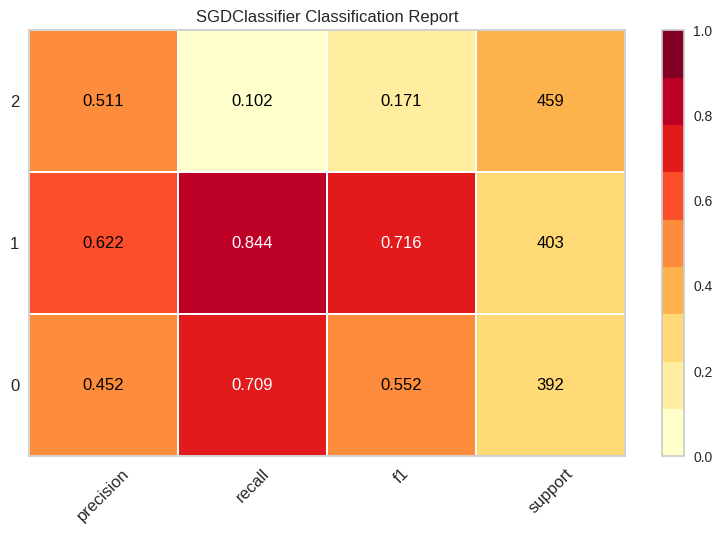

In [60]:
# plot class report
plot_model(best, plot = 'class_report')

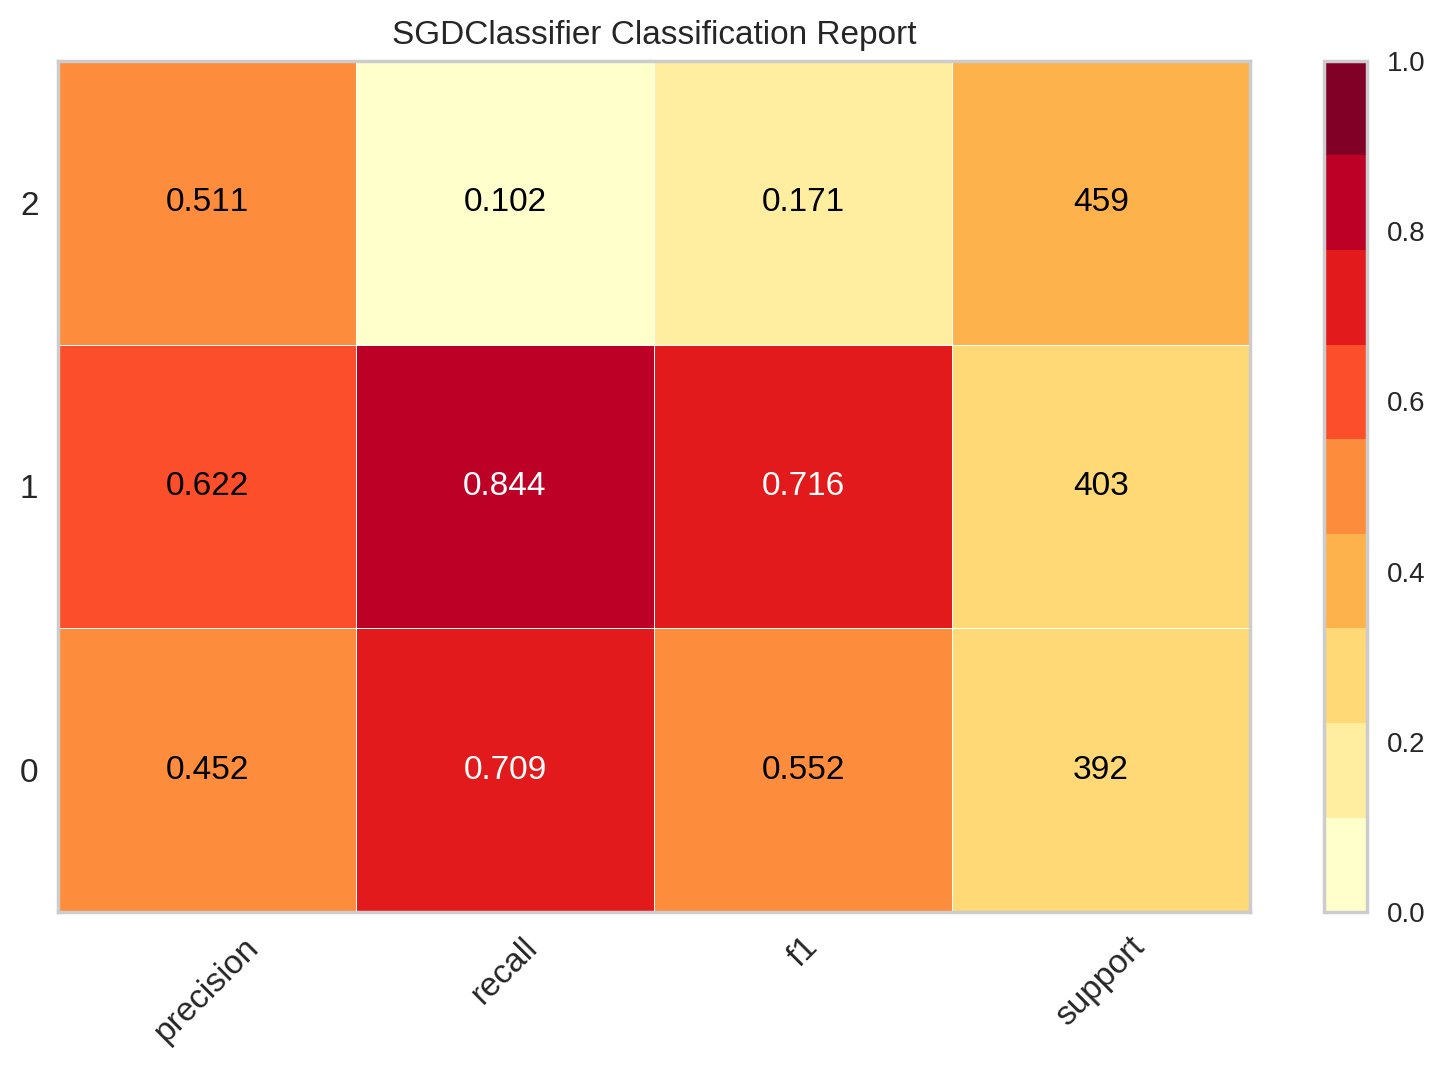

In [61]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [62]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

## ✅ Interpret Model

In [63]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5188,0.7290,0.5188,0.5141,0.5159,0.2753,0.2756
1,0.5427,0.7402,0.5427,0.5478,0.5439,0.3098,0.3108
2,0.5461,0.7361,0.5461,0.5429,0.5443,0.3169,0.3171
3,0.5137,0.7108,0.5137,0.4987,0.5008,0.2647,0.2678
4,0.5685,0.7530,0.5685,0.5653,0.5658,0.3492,0.3500
5,0.5034,0.7400,0.5034,0.4920,0.4967,0.2543,0.2547
6,0.5651,0.7415,0.5651,0.5593,0.5598,0.3437,0.3452
7,0.5274,0.7406,0.5274,0.5132,0.5176,0.2910,0.2924
8,0.5274,0.7289,0.5274,0.5199,0.5226,0.2885,0.2891


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

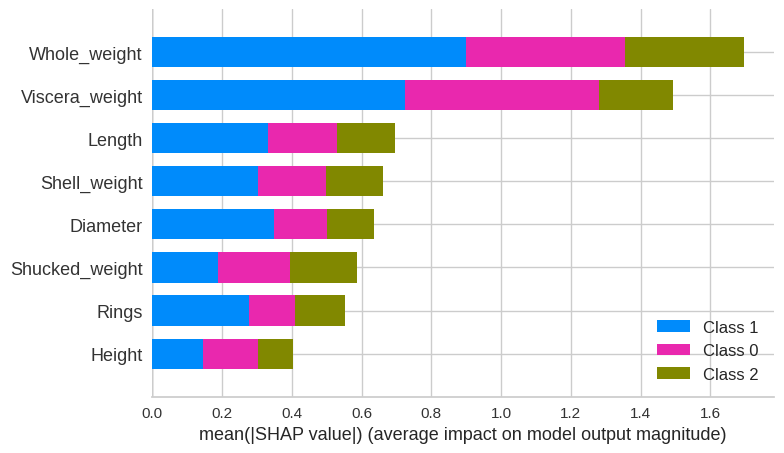

In [64]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [65]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [66]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/59 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.5552,0.0000,0.5552,0.5471,0.5383,0.3274,0.3346
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5217,0.7083,0.5217,0.5174,0.5178,0.2830,0.2841
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.5135,0.7276,0.5135,0.4900,0.4839,0.2774,0.2878
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.4837,0.6111,0.4837,0.4847,0.4834,0.2247,0.2250
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.5569,0.0000,0.5569,0.5117,0.5175,0.3292,0.3519
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.5265,0.0000,0.5265,0.5136,0.4942,0.2861,0.2990
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995


In [67]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(add_indicato...
                                                                  n_jobs=None,
                                                                  penalty='l2',
                                                                  random_state=123,
                                                                  solver='lbfgs',
                                                                  tol=0.0001,
                                                                  verbose=0,
                                                                  warm_start=False)),
                                              ('Ridge Classifier',
                                               RidgeClassifier(alpha=1.0,
                                                               class_weight=None,
                                                               copy_X=True,
                                                               fit_intercept=True,
                                                               max_iter=None,
                                                               positive=False,
                                                               random_state=123,
                                                               solver='auto',
                                                               tol=0.0001))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='hard',
                                  weights=None)]],
         verbose=False)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [68]:
automl()

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=4,
                       max_features=0.5880706013083212, max_leaf_nodes=None,
                       max_samples=None,
                       min_impurity_decrease=9.573658597419722e-08,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=67, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [69]:
# dashboard function
dashboard(rf, display_format ='inline')

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Cal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [70]:
final_best = finalize_model(best)

In [71]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(add_indicato...
                ('actual_estimator',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.001,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=-1,
                               penalty='l2', power_t=0.5, random_state=123,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [72]:
# save model
save_model(best, 'abalone_sex_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicato...
                 ('trained_model',
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.001,
                                fit_intercept=True, l1_ratio=0.15,
                                learning_rate=

In [73]:
# load model
loaded_from_disk = load_model('abalone_sex_final')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(a...
                ('trained_model',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.001,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=-1,
                               penalty='l2', power_t=0.5, random_state=123,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [76]:
# save experiment
save_experiment('abalone_sex_final_experiment')

In [77]:
# load experiment from disk
exp_from_disk = load_experiment('abalone_sex_final_experiment', data=df_abalone)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True
